# Lecture 04. Logistic regression

The simplest classication problem claims that the output $y \in \{0, 1\}$.
![](../../img/lec04_simple_class.png)

One way to solve this problem is to train linear regression, and after we take some threshold for the straight line. Sometimes it works, but in general it is not a good idea. 

The good idea is to change our hypothesis such that $h_w(x) \in [0; 1]$

But with this assumption linear function is not the best choice for $h_w(x)$. We choose $h_w(x)$ as follows:

$h_w(x) = g(W^T x) = \frac{1}{1 + e^{-W^T X}}$ - sigmoid function or logistic function.


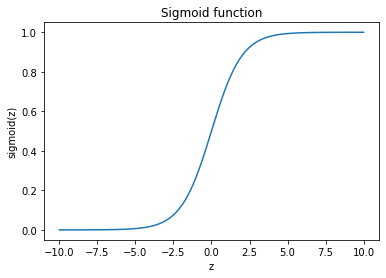

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

def sigma(z):
    return 1. / (1 + np.exp(-z))

xx = np.linspace(-10, 10, 1000)
plt.plot(xx, [sigma(x) for x in xx]);
plt.xlabel('z');
plt.ylabel('sigmoid(z)')
plt.title('Sigmoid function')
plt.show()

To understand the logistic regression from the probabilistic point of view we defne the
probability density function as

$p(y = 1 \mid x;W) = h_W(x)$

$p(y = 0 \mid x;W) = 1 - h_W(x)$, then

$p(y \mid x; W) = h_W(x)^y (1 - h_W(x))^{1 - y}$

The likehood
$L(W) = p(y \mid X; W) = \prod_{i=1}^m p(y^{(i)} \mid x^{(i)}; W) = \prod_{i=1}^m h_W(x^{(i)})^{(y^i)} (1 - h_W(x^{(i)}))^{(1-y^i)}$

And we should maximize the log-likehood

$l(W) = \ln L(W) = \sum_{i=1}^m y^{(i)} \ln  h_W(x^{(i)}) + (1 - y^{(i)}) \ln(1 - h_W(x^{(i)}))$

## Cost function

$cost(h_W(x), y) = 
\begin{cases}
-\log(h_w(x)), & \text{if }y=1 \\
    -\log(1 - h_w(x)), & \text{if }y=0 \\
\end{cases}
$



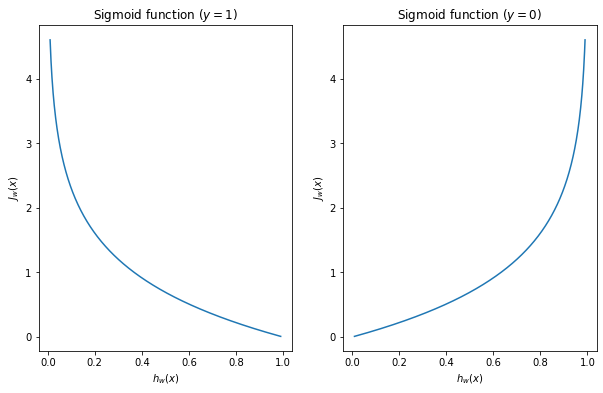

In [21]:
import math
fig = plt.figure(figsize=(10,6))
xx = np.linspace(0.01, 0.99, 1000)
plt.subplot(121)
plt.plot(xx, [-math.log(x) for x in xx]);
plt.xlabel('$h_w(x)$');
plt.ylabel('$J_w(x)$')
plt.title('Sigmoid function ($y=1$)')
plt.subplot(122)
plt.plot(xx, [-math.log(1-x) for x in xx]);
plt.xlabel('$h_w(x)$');
plt.ylabel('$J_w(x)$')
plt.title('Sigmoid function ($y=0$)')
plt.show()

$J(W) = \frac{1}{m} [\sum_{i=1}^{m} y^{(i)}\log h_W(x^{(i)}) + (1-y^{(i)})\log (1 - h_W(x^{(i)})) ] $

Want to $\min J(W)$:

repeat 

$\{\\
    W_j = W_j - \alpha \frac{\partial}{\partial W_j} J(W) \\
\}$ 

where $\frac{\partial}{\partial W_j} J(W) = \frac{1}{m} \sum_{i=1}^{m} (h_W(x^{(i)}) - y^{(i)})x_j^{(i)}$

Update should be performed simultaneously.



## Multiclass classification

* Email foldering / tgging: work, friends, family, hobby
* Medical diagrams: not ill, cold, flu
* Wheather: sunny, cloudy, rain, snow

![](../../img/lec03_multiclass.png)


One-vs-all:
* Train a logistic regression classifier $h_w^{(i)}(x)$ for each class i to predict the probability  that $y=1$
* On new input $x$ to make prediction, pick the class $i$ that maximizes $\max_i h_W^{(i)}(x)$